In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from statsmodels.discrete.discrete_model import Logit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from statsmodels.tools import add_constant
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn import metrics

%matplotlib inline

# Cleaning

In [7]:
df = pd.read_csv('data/churn_train.csv')

In [8]:
df.describe().T
df.shape

(40000, 12)

/home/rosina/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


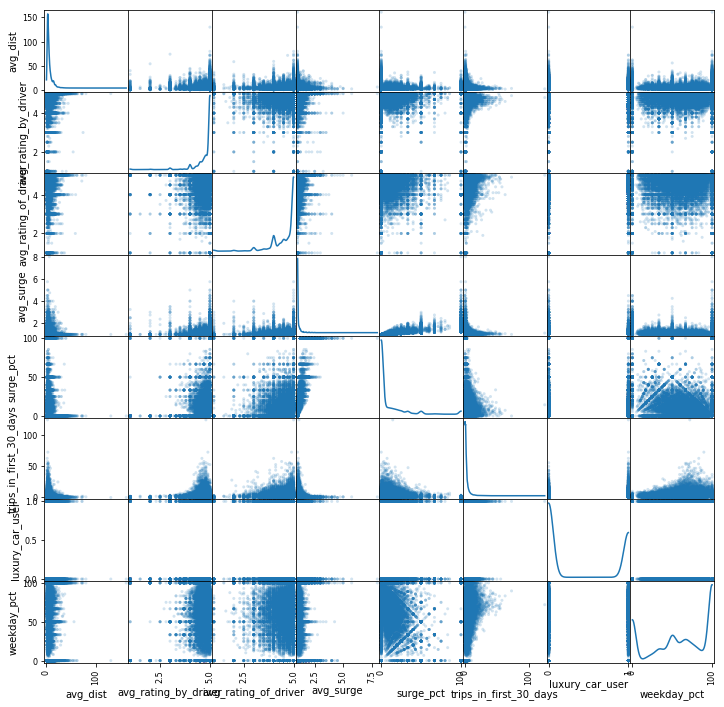

In [9]:
scatter_matrix(df, alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.show()

In [10]:
df.dtypes

avg_dist                  float64
avg_rating_by_driver      float64
avg_rating_of_driver      float64
avg_surge                 float64
city                       object
last_trip_date             object
phone                      object
signup_date                object
surge_pct                 float64
trips_in_first_30_days      int64
luxury_car_user              bool
weekday_pct               float64
dtype: object

-> Av_surge
-> Week
-> Trips in the 30 days
-> Avg_dist
Phone 

In [11]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date']) 
df['signup_date'] = pd.to_datetime(df['signup_date']) 
df['churn'] = df['last_trip_date'].apply(lambda x: 1 if x < pd.Timestamp('2014-06-01') else 0)
print 'percentage of not churn: {}%' .format(df[df['churn']==0]['churn'].count()/float(df.shape[0])*100)
df.dtypes

percentage of not churn: 37.58%


avg_dist                         float64
avg_rating_by_driver             float64
avg_rating_of_driver             float64
avg_surge                        float64
city                              object
last_trip_date            datetime64[ns]
phone                             object
signup_date               datetime64[ns]
surge_pct                        float64
trips_in_first_30_days             int64
luxury_car_user                     bool
weekday_pct                      float64
churn                              int64
dtype: object

In [12]:
df = pd.get_dummies(df, columns=['city'])
df.head()
#cities = ['city_Astapor',"city_King's_Landing",'city_Winterfell']

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn,city_Astapor,city_King's Landing,city_Winterfell
0,6.94,5.0,5.0,1.00,2014-05-03,Android,2014-01-12,0.0,0,False,100.0,1,1,0,0
1,8.06,5.0,5.0,1.00,2014-01-26,Android,2014-01-25,0.0,2,True,0.0,1,1,0,0
2,21.50,4.0,NaN,1.00,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0,1,0,0,1
3,9.46,5.0,NaN,2.75,2014-01-10,Android,2014-01-09,100.0,1,False,100.0,1,0,0,1
4,13.77,5.0,NaN,1.00,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0,1,0,0,1


In [13]:
df = pd.get_dummies(df, columns=['phone'])
df.head()
#cities = ['city_Astapor',"city_King's_Landing",'city_Winterfell']

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,6.94,5.0,5.0,1.00,2014-05-03,2014-01-12,0.0,0,False,100.0,1,1,0,0,1,0
1,8.06,5.0,5.0,1.00,2014-01-26,2014-01-25,0.0,2,True,0.0,1,1,0,0,1,0
2,21.50,4.0,NaN,1.00,2014-05-21,2014-01-02,0.0,1,True,100.0,1,0,0,1,0,1
3,9.46,5.0,NaN,2.75,2014-01-10,2014-01-09,100.0,1,False,100.0,1,0,0,1,1,0
4,13.77,5.0,NaN,1.00,2014-05-13,2014-01-31,0.0,0,False,100.0,1,0,0,1,0,1


In [15]:
df = pd.get_dummies(df, columns=['luxury_car_user'])
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,weekday_pct,churn,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,luxury_car_user_False,luxury_car_user_True
0,6.94,5.0,5.0,1.00,2014-05-03,2014-01-12,0.0,0,100.0,1,1,0,0,1,0,1,0
1,8.06,5.0,5.0,1.00,2014-01-26,2014-01-25,0.0,2,0.0,1,1,0,0,1,0,0,1
2,21.50,4.0,NaN,1.00,2014-05-21,2014-01-02,0.0,1,100.0,1,0,0,1,0,1,0,1
3,9.46,5.0,NaN,2.75,2014-01-10,2014-01-09,100.0,1,100.0,1,0,0,1,1,0,1,0
4,13.77,5.0,NaN,1.00,2014-05-13,2014-01-31,0.0,0,100.0,1,0,0,1,0,1,1,0


In [16]:
df['Weekday'] = 0
df['Weekend'] = 0
df['Weekend'][df['weekday_pct'] < 10] = 1
df['Weekday'][df['weekday_pct'] > 90] = 1

/home/rosina/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/rosina/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [23]:
def standard_confusion_matrix(y_true, y_pred):
    """Make confusion matrix with format:
                  -----------
                  | TP | FP |
                  -----------
                  | FN | TN |
                  -----------
    Parameters
    ----------
    y_true : ndarray - 1D
    y_pred : ndarray - 1D
    Returns
    -------
    ndarray - 2D
    """
    [[tn, fp], [fn, tp]] = confusion_matrix(y_true, y_pred)
    return np.array([[tp, fp], [fn, tn]])

NAN's in Phone, average rating of driver, average rating by driver

## Baseline

In [43]:
y_pred_base = np.ones(df.shape[0])
y_train = df['churn']
cf_mat = standard_confusion_matrix(y_train, y_pred_base)
print cf_mat
tp, fp, fn, tn = cf_mat[0,0], cf_mat[0,1], cf_mat[1,0], cf_mat[1,1]
profit = (tp * 30 + fp * -10) / float(tp + fp + fn + tn)
print profit

[[24968 15032]
 [    0     0]]
14.968


# Third logistic regression

In [34]:
y = df['churn']
#X = df[['weekday_pct','avg_surge','avg_dist']]
X = df[['avg_dist','trips_in_first_30_days','city_Astapor',"city_King's Landing",'phone_Android','phone_iPhone']]
X['constant'] = 1
X_train, y_train = X, y

/home/rosina/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [35]:
#X_train, X_test, y_train, y_test = train_test_split(X, y)

In [44]:
logit = Logit(y_train, X_train)
sms_fit = logit.fit()
sms_fit.summary()

Optimization terminated successfully.
         Current function value: 0.573569
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                40000
Model:                          Logit   Df Residuals:                    39993
Method:                           MLE   Df Model:                            6
Date:                Fri, 21 Jul 2017   Pseudo R-squ.:                  0.1335
Time:                        15:07:56   Log-Likelihood:                -22943.
converged:                       True   LL-Null:                       -26479.
                                        LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
avg_dist                   0.0333      0.002     14.751      0.000       0.029       0.038
trips_in_first_30_days    -0.1325      0.004    -34.513      0.000      -0.140      -0.125
city_Astapor               0.4531      0.027     17.095      0.000       0.401       0.505
city_King's Landing       -1.1973      0.029    -40.904      0.000      -1.255      -1.140
phone_Android              0.5329      0.131      4.062      0.000       0.276       0.790
phone_iPhone              -0.5892      0.130     -4.544      0.000      -0.843      -0.335
constant                   1.0288      0.131      7.869      0.000       0.773       1.285
==========================================================================================
"""

In [45]:
logistic = LogisticRegression()
accuracy=np.mean(cross_val_score(logistic, X_train, y_train,cv=5))
print 'Accuracy: {}' .format(accuracy)

Accuracy: 0.711499990137


In [46]:
recall = np.mean(cross_val_score(logistic, X_train, y_train,cv=5, scoring=make_scorer(recall_score)))
print 'recall: {}' .format(recall)
recall = np.mean(cross_val_score(logistic, X_train, y_train,cv=5, scoring=make_scorer(precision_score)))
print 'precision: {}' .format(recall)

recall: 0.888016615332
precision: 0.717168489997


In [47]:
fit = logistic.fit(X_train, y_train)
y_pred = fit.predict(X_train)
y_pred_proba = fit.predict_proba(X_train)
print 'data points: {}'. format(len(y_pred))
print 'Ones: {}%' .format((y_pred==1).sum()/float(len(y_pred))*100)

data points: 40000
Ones: 77.3125%


In [48]:
cf_mat = standard_confusion_matrix(y_train, y_pred)
print cf_mat
tp, fp, fn, tn = cf_mat[0,0], cf_mat[0,1], cf_mat[1,0], cf_mat[1,1]
profit = (tp * 30 + fp * -10) / float(tp + fp + fn + tn)
print profit

[[22177  8748]
 [ 2791  6284]]
14.44575


In [49]:
def roc_curve_gal(probabilities, labels):
    '''
    INPUT: numpy array, numpy array
    OUTPUT: list, list, list
    Take a numpy array of the predicted probabilities and a numpy array of the
    true labels.
    Return the True Positive Rates, False Positive Rates and Thresholds for the
    ROC curve.
    '''
    
    thresholds = np.sort(probabilities)

    tprs = []
    fprs = []

    num_positive_cases = sum(labels)
    num_negative_cases = len(labels) - num_positive_cases

    for threshold in thresholds:
        # With this threshold, give the prediction of each instance
        predicted_positive = probabilities >= threshold
        # Calculate the number of correctly predicted positive cases
        true_positives = np.sum(predicted_positive * labels)
        # Calculate the number of incorrectly predicted positive cases
        false_positives = np.sum(predicted_positive) - true_positives
        # Calculate the True Positive Rate
        tpr = true_positives / float(num_positive_cases)
        # Calculate the False Positive Rate
        fpr = false_positives / float(num_negative_cases)

        fprs.append(fpr)
        tprs.append(tpr)

    return tprs, fprs, thresholds.tolist()

In [400]:
true_pos, false_pos, thresholds = roc_curve_gal(y_pred_proba[:,0], y_train)

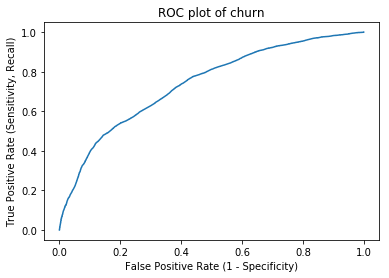

In [402]:
plt.plot(true_pos, false_pos)
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity, Recall)")
plt.title("ROC plot of churn")
plt.show()

In [318]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_proba[:,1])

In [320]:
standard_confusion_matrix(y_train, y_pred)

array([[22177,  8748],
       [ 2791,  6284]])

# Fourth Model

In [50]:
y = df['churn']
#X = df[['weekday_pct','avg_surge','avg_dist']]
X = df[['avg_dist','trips_in_first_30_days','city_Astapor',"city_King's Landing",'phone_Android','phone_iPhone','Weekend','Weekday','luxury_car_user_True']]
X['constant'] = 1
X_train, y_train = X, y

/home/rosina/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [51]:
logit = Logit(y_train, X_train)
sms_fit = logit.fit()
sms_fit.summary()

Optimization terminated successfully.
         Current function value: 0.514045
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                40000
Model:                          Logit   Df Residuals:                    39990
Method:                           MLE   Df Model:                            9
Date:                Fri, 21 Jul 2017   Pseudo R-squ.:                  0.2235
Time:                        15:08:29   Log-Likelihood:                -20562.
converged:                       True   LL-Null:                       -26479.
                                        LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
avg_dist                   0.0226      0.002      9.177      0.000       0.018       0.027
trips_in_first_30_days    -0.0534      0.004    -14.478      0.000      -0.061      -0.046
city_Astapor               0.5268      0.028     18.527      0.000       0.471       0.583
city_King's Landing       -1.2539      0.032    -39.627      0.000      -1.316      -1.192
phone_Android              0.3190      0.141      2.258      0.024       0.042       0.596
phone_iPhone              -0.7696      0.140     -5.508      0.000      -1.044      -0.496
Weekend                    1.5969      0.037     42.614      0.000       1.523       1.670
Weekday                    1.4004      0.029     48.634      0.000       1.344       1.457
luxury_car_user_True      -0.8357      0.025    -33.554      0.000      -0.885      -0.787
constant                   0.7181      0.142      5.063      0.000       0.440       0.996
==========================================================================================
"""

In [52]:
logistic = LogisticRegression()
accuracy=np.mean(cross_val_score(logistic, X_train, y_train,cv=5))
print 'Accuracy: {}' .format(accuracy)
recall = np.mean(cross_val_score(logistic, X_train, y_train,cv=5, scoring=make_scorer(recall_score)))
print 'recall: {}' .format(recall)
recall = np.mean(cross_val_score(logistic, X_train, y_train,cv=5, scoring=make_scorer(precision_score)))
print 'precision: {}' .format(recall)
fit = logistic.fit(X_train, y_train)
y_pred = fit.predict(X_train)
y_pred_proba = fit.predict_proba(X_train)
print 'data points: {}'. format(len(y_pred))
print 'Ones: {}%' .format((y_pred==1).sum()/float(len(y_pred))*100)

Accuracy: 0.750375009355
recall: 0.840435528442
precision: 0.777625396343
data points: 40000
Ones: 67.5025%


In [53]:
cf_mat = standard_confusion_matrix(y_train, y_pred)
print cf_mat
tp, fp, fn, tn = cf_mat[0,0], cf_mat[0,1], cf_mat[1,0], cf_mat[1,1]
profit = (tp * 30 + fp * -10) / float(tp + fp + fn + tn)
print profit

[[20993  6008]
 [ 3975  9024]]
14.24275


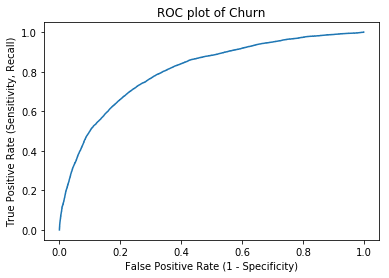

In [392]:
true_pos, false_pos, thresholds = roc_curve_gal(y_pred_proba[:,0], y_train)
plt.plot(true_pos, false_pos)
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity, Recall)")
plt.title("ROC plot of Churn")
plt.show()